Questions to be answered in this project: 

1. How do different factors influence the risk for having diabetes? What are the interactions between them? 
2. Computation of the risk one might be affected by diabetes and how well can the risk of having or getting diabetes be predicted from the dataset? 


Dataset used: 

https://www.kaggle.com/tigganeha4/diabetes-dataset-2019


In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors


#### Diabetes Risk according to habits 

like smoking, fitness, bmi...

In [2]:
data_1 = pd.read_csv(r"C:\Users\Anna\Desktop\EDX_DataScience\Week3\Week-9-final Project\archive_DiabetsHabits\diabetes_dataset__2019.csv")

In [3]:
data_1= data_1.dropna()

In [4]:
# drop or rename variables / column
data_1.loc[(data_1.Diabetic == " no")] = "no"

Age_drop = data_1[data_1.Age == "no"].index
data_1.drop(Age_drop, inplace = True)

Med_drop = data_1[data_1.RegularMedicine == "o"].index
data_1.drop(Med_drop, inplace = True)

data_1.loc[(data_1.BPLevel == "High")] = "high"
data_1.loc[(data_1.BPLevel == 'normal ')] = "normal"
data_1.loc[(data_1.BPLevel == 'Low')] = "low"

Preg_drop_H = data_1[data_1.Pregancies == "high"].index
data_1.drop(Preg_drop_H, inplace = True)

Preg_drop_N = data_1[data_1.Pregancies == "normal"].index
data_1.drop(Preg_drop_N, inplace = True)

Preg_drop_L = data_1[data_1.Pregancies == "low"].index
data_1.drop(Preg_drop_L, inplace = True)

data_1.drop(["Pdiabetes"], axis = 1, inplace= True)
data_1.drop(["SoundSleep"], axis = 1, inplace= True)
data_1.drop(["BPLevel"], axis = 1, inplace= True)

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 951
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               895 non-null    object
 1   Gender            895 non-null    object
 2   Family_Diabetes   895 non-null    object
 3   highBP            895 non-null    object
 4   PhysicallyActive  895 non-null    object
 5   BMI               895 non-null    object
 6   Smoking           895 non-null    object
 7   Alcohol           895 non-null    object
 8   Sleep             895 non-null    object
 9   RegularMedicine   895 non-null    object
 10  JunkFood          895 non-null    object
 11  Stress            895 non-null    object
 12  Pregancies        895 non-null    object
 13  UriationFreq      895 non-null    object
 14  Diabetic          895 non-null    object
dtypes: object(15)
memory usage: 111.9+ KB


In [6]:
# dummy variables

#Age with ordinal number encoding, since natural ordered relationship is given
dict_age = {'less than 40':0, '40-49':1, '50-59':2, '60 or older':3 }
data_age = data_1.Age.map(dict_age)

#Gender
dict_gender = {"Male":0, "Female":1}
data_ageM = data_1.Gender.map(dict_gender)

#Family Diabetes
dict_fam = {"no":0, "yes":1}
data_fam = data_1.Family_Diabetes.map(dict_fam)

#High blood pressure
dict_bp = {"no":0, "yes":1}
data_bp = data_1.highBP.map(dict_bp)

#fitness 
dict_fit = {"none": 0, 'one hr or more':3, 'less than half an hr':1, 'more than half an hr':2}
data_fit = data_1.PhysicallyActive.map(dict_fit)

#BMI
data_bmi = data_1.BMI.astype(int)

#Smoking
dict_smok = {"no":0, "yes":1}
data_smok = data_1.Smoking.map(dict_smok)

#Smoking
dict_alc = {"no":0, "yes":1}
data_alc = data_1.Alcohol.map(dict_alc)

#Sleep 
data_sleep = data_1.Sleep.astype(int)

#Regular Medicine
dict_med = {"no":0, "yes":1}
data_med = data_1.RegularMedicine.map(dict_med)

#Junk Food
dict_jf = {"occasionally": 0, 'often':1, 'very often':2, 'always':3}
data_jf = data_1.JunkFood.map(dict_jf)

#Stress
dict_stress = {'sometimes':1, 'not at all':0, 'very often':2, 'always':3}
data_stress = data_1.Stress.map(dict_stress)

#Pregnanicies
data_preg = data_1.Pregancies.astype(int)

#Urination frequencies
dict_urin = {'not much':0, 'quite often':1}
data_urin = data_1.UriationFreq.map(dict_urin)

#Diabetic
dict_diabetic = {"no":0, "yes":1}
data_diabetic = data_1.Diabetic.map(dict_diabetic)


In [7]:
X = pd.concat([data_age, data_ageM, data_fam, data_bp, data_fit, data_bmi, data_smok, data_alc, data_sleep, data_med, data_jf, data_stress, data_preg, data_urin], axis = 1, verify_integrity = True)

y = data_diabetic

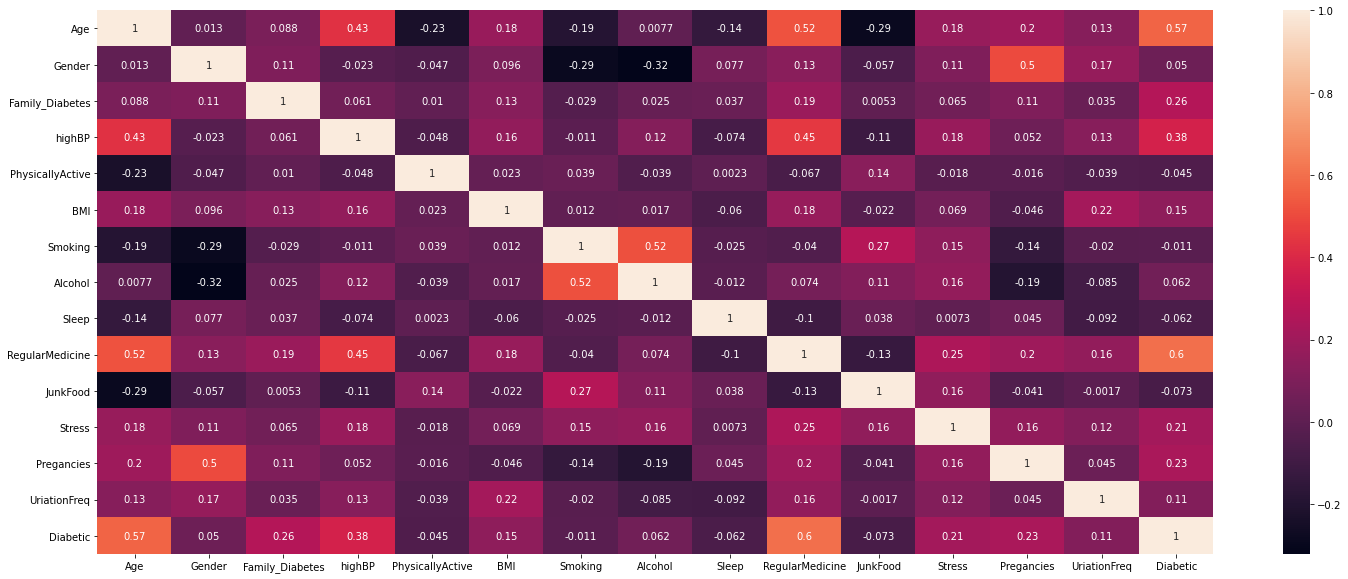

In [8]:
data1_all = pd.concat([X,y], axis = 1)
corr = data1_all.corr()

plt.figure(figsize = (25,10))
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
def percentage_diab(column_x, value):
    num_val_tot = data_1[data_1[column_x] == value].shape[0]
    num_val_diab = data_1[(data_1[column_x] == value) & (data_1.Diabetic == "yes")].shape[0]

    return round(num_val_diab/num_val_tot*100)

<Figure size 432x288 with 0 Axes>

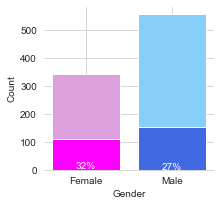

In [10]:
plt.suptitle("Data Distribution", fontsize = 18)

sns.set_style("whitegrid")
plt.figure(figsize=(14,3))
plt.subplot(141)
data_gender = data_1.groupby(['Diabetic', 'Gender']).size().reset_index().pivot(columns='Diabetic', index='Gender', values=0)
plt.bar(["Female", "Male"], data_gender["yes"], color = [ "fuchsia", "royalblue"])
plt.bar(["Female", "Male"], data_gender["no"], bottom=data_gender["yes"], color=["plum", "lightskyblue"])
sns.despine(left = True)
plt.xlabel("Gender")
plt.ylabel("Count")

pos = [(0,5), (1,2)]
colors = ["white", "white"]
label = [str(percentage_diab("Gender", "Female"))+"%", str(percentage_diab("Gender", "Male"))+"%"]
for i in range(2): 
    plt.text(x = i, y = label[i], s = label[i], ha = "center", position = pos[i], color = colors[i])

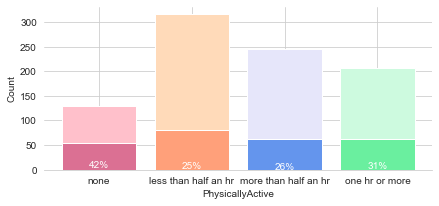

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(32,3))
plt.subplot(144)
data_fit = data_1.groupby(['Diabetic', 'PhysicallyActive']).size().reset_index().pivot(columns='Diabetic', index='PhysicallyActive', values=0)
data_fit1 = data_fit.reindex(['none','less than half an hr', 'more than half an hr', 'one hr or more'])
plt.bar(['none','less than half an hr', 'more than half an hr', 'one hr or more'], data_fit1["yes"], color = [ "palevioletred", "lightsalmon", "cornflowerblue", "#6aef9f"])
plt.bar(['none','less than half an hr', 'more than half an hr', 'one hr or more'], data_fit1["no"], bottom=data_fit1["yes"], color=["pink", "peachpuff", "lavender", "#cdfadf"])
plt.xlabel("PhysicallyActive")
plt.ylabel("Count")
sns.despine(left = True)

pos = [(0,5), (1,2), (2,1), (3,2)]
colors = ["white", "white", "white", "white"]
label = [str(percentage_diab("PhysicallyActive", "none"))+"%", str(percentage_diab("PhysicallyActive", "less than half an hr"))+"%", str(percentage_diab("PhysicallyActive", "more than half an hr"))+"%", str(percentage_diab("PhysicallyActive", "one hr or more")) +"%"]
for i in range(4): 
    plt.text(x = i, y = label[i], s = label[i], ha = "center", position = pos[i], color = colors[i])

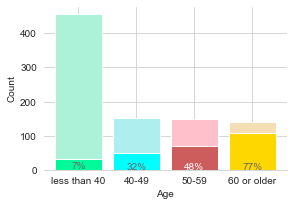

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,3))
plt.subplot(142)
data_age = data_1.groupby(['Diabetic', 'Age']).size().reset_index().pivot(columns='Diabetic', index='Age', values=0)
data_age1 = data_age.reindex(["less than 40", "40-49", "50-59", "60 or older"])
plt.bar(["less than 40", "40-49", "50-59", "60 or older"], data_age1["yes"], color = [ "mediumspringgreen", "aqua", "indianred", "gold"])
plt.bar(["less than 40", "40-49", "50-59", "60 or older"], data_age1["no"], bottom=data_age1["yes"], color=["#abf2d8", "paleturquoise", "pink", "wheat"])
sns.despine(left = True)
plt.xlabel("Age")
plt.ylabel("Count")

pos = [(0,5), (1,2), (2,1), (3,2)]
colors = ["dimgrey", "dimgray", "white", "dimgray"]
label = [str(percentage_diab("Age", "less than 40"))+"%", str(percentage_diab("Age", "40-49"))+"%", str(percentage_diab("Age", "50-59"))+"%", str(percentage_diab("Age", "60 or older")) +"%"]
for i in range(4): 
    plt.text(x = i, y = label[i], s = label[i], ha = "center", position = pos[i], color = colors[i])

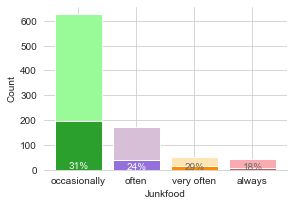

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,3))
plt.subplot(143)
data_jf = data_1.groupby(['Diabetic', 'JunkFood']).size().reset_index().pivot(columns='Diabetic', index='JunkFood', values=0).sort_values(['no', 'yes'],ascending = False)
plt.bar(['occasionally', 'often', 'very often', 'always'], data_jf["yes"], color = [ "tab:green", "mediumpurple", "darkorange", "indianred"])
plt.bar(['occasionally', 'often', 'very often', 'always'], data_jf["no"], bottom=data_jf["yes"], color=["palegreen", "thistle", "moccasin", "#f9abb2"])
plt.xlabel("Junkfood")
plt.ylabel("Count")
sns.despine(left = True)

pos = [(0,5), (1,2), (2,1), (3,2)]
colors = ["white", "white", "dimgrey", "dimgrey"]
label = [str(percentage_diab("JunkFood", "occasionally"))+"%", str(percentage_diab("JunkFood", "often"))+"%", str(percentage_diab("JunkFood", "very often"))+"%", str(percentage_diab("JunkFood", "always")) +"%"]
for i in range(4): 
    plt.text(x = i, y = label[i], s = label[i], ha = "center", position = pos[i], color = colors[i])

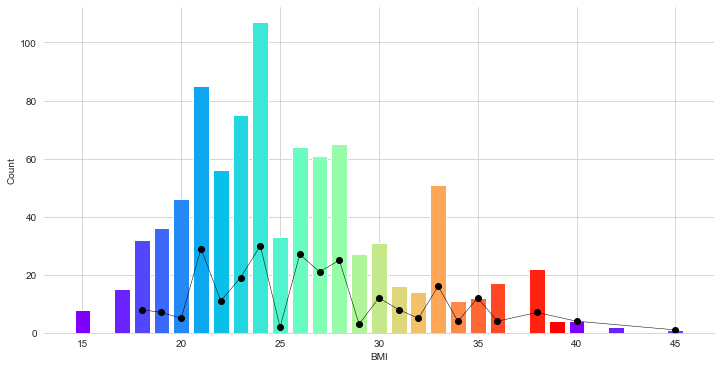

In [15]:
ax1 = sns.set_style(style = "whitegrid", rc = None)
fig, ax1 = plt.subplots(figsize= (12,6))
data_bmi_diab_grouped = data_1[data_1.Diabetic == "yes"].groupby("BMI").count()
ax1.plot(data_bmi_diab_grouped["Age"], marker = "o", color = "black", linewidth = 0.5)

x = np.array(range(20000))
y = np.array(range(23))
my_cmap = plt.get_cmap("rainbow")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
data_bmi_grouped = data_1.groupby("BMI").count().reset_index()

ax1.bar(data_bmi_grouped["BMI"], data_bmi_grouped["Age"], color = my_cmap(rescale(y)))

plt.xlabel("BMI")
plt.ylabel("Count")

sns.despine(left = True)

In [20]:
data_1[(data_1.Gender == "Male") & (data_1.Pregancies > 0)].shape

(12, 15)

In [21]:
data_1.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'RegularMedicine', 'JunkFood', 'Stress',
       'Pregancies', 'UriationFreq', 'Diabetic'],
      dtype='object')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33)

In [16]:
data_1.shape

(895, 15)

In [18]:
X_train.shape

(599, 14)

In [19]:
X_test.shape

(296, 14)

In [13]:
# ML with Decision Tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

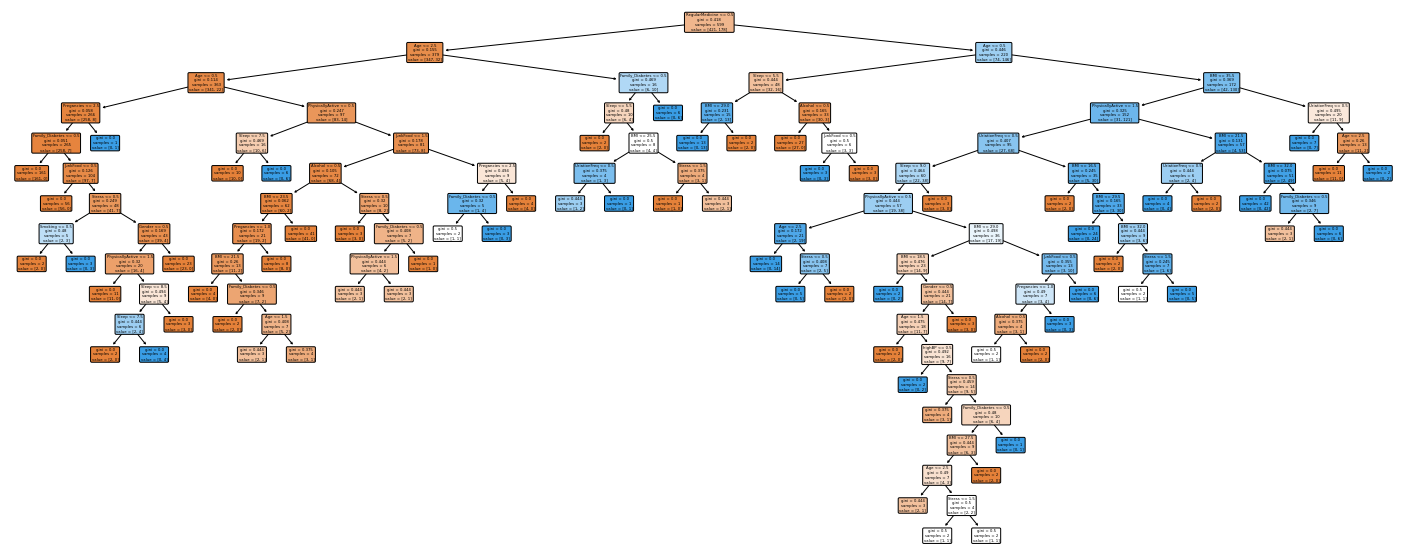

In [14]:
featurenames = list(data_1.columns)
featurenames.remove("Diabetic")

plt.figure(figsize=(25,10))
a = plot_tree(dtree, feature_names=featurenames, filled = True, rounded=True)

In [15]:
predictions[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [16]:
y_test[:10]

747    1
506    0
856    0
370    1
271    1
465    1
38     1
576    0
51     0
667    0
Name: Diabetic, dtype: int64

In [17]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9628378378378378

In [31]:
data_1[(data_1.Gender == "Male") & (data_1.Pregancies > 0)]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,RegularMedicine,JunkFood,Stress,Pregancies,UriationFreq,Diabetic
51,40-49,Male,no,no,more than half an hr,23,no,no,7,no,often,sometimes,2,not much,no
52,60 or older,Male,no,yes,less than half an hr,19,no,yes,6,yes,often,sometimes,1,not much,no
54,less than 40,Male,no,no,more than half an hr,30,yes,yes,5,yes,often,not at all,1,not much,no
289,40-49,Male,no,no,more than half an hr,23,no,no,7,no,often,sometimes,2,not much,no
290,60 or older,Male,no,yes,less than half an hr,19,no,yes,6,yes,often,sometimes,1,not much,yes
292,less than 40,Male,no,no,more than half an hr,30,yes,yes,5,yes,often,not at all,1,not much,no
527,40-49,Male,no,no,more than half an hr,23,no,no,7,no,often,sometimes,2,not much,no
528,60 or older,Male,no,yes,less than half an hr,19,no,yes,6,yes,often,sometimes,1,not much,no
530,less than 40,Male,no,no,more than half an hr,30,yes,yes,5,yes,often,not at all,1,not much,no
765,40-49,Male,no,no,more than half an hr,23,no,no,7,no,often,sometimes,2,not much,no
